# Proyecto para predecir el coste del seguro médico de una persona de Luisa

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)

df.iloc[:5]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
print(df.info())
print("Dimensiones del DataFrame:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
Dimensiones del DataFrame: (1338, 7)


El DataFrame contiene 1,338 registros y 7 columnas, sin presencia de valores nulos en ninguna de ellas. Las columnas incluyen tanto variables numéricas (age, bmi, children, charges) como categóricas (sex, smoker, region). En cuanto a los tipos de datos, hay 2 columnas de tipo float64, 2 de tipo int64 y 3 de tipo object, lo que indica una combinación equilibrada de datos cuantitativos y cualitativos.

In [3]:
df_sin_duplicados = df.drop_duplicates()

print("Dimensiones después de eliminar duplicados:", df_sin_duplicados.shape)

Dimensiones después de eliminar duplicados: (1337, 7)


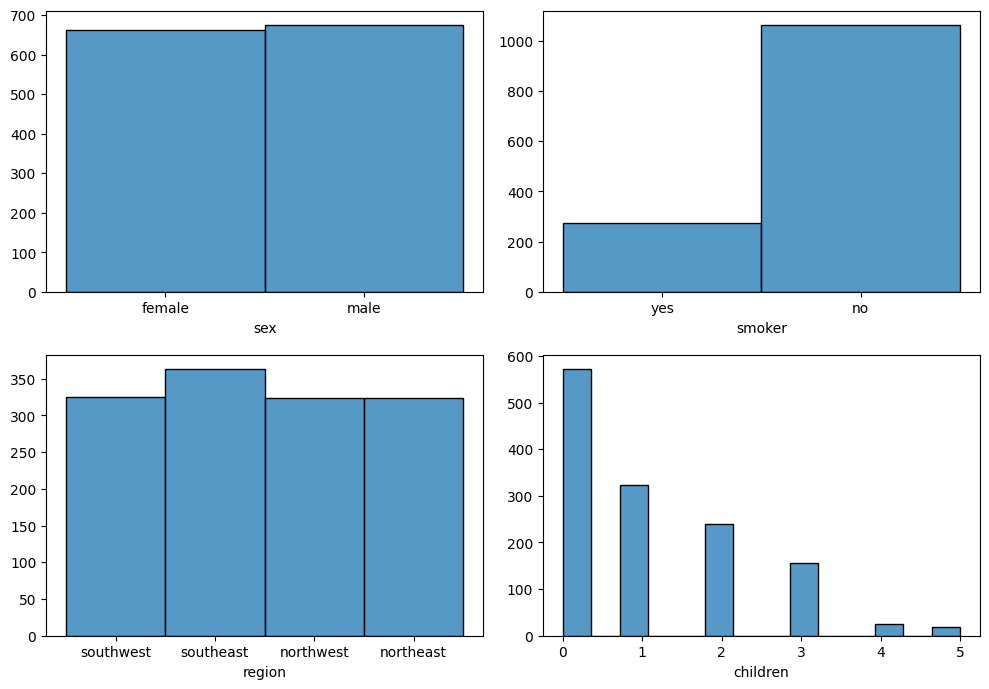

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de subgráficos
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Crear un histograma múltiple
sns.histplot(ax=axis[0, 0], data=data, x="sex").set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=data, x="smoker").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=data, x="region").set(ylabel=None)
sns.histplot(ax=axis[1, 1], data=data, x="children").set(ylabel=None)


plt.tight_layout()


plt.show()

Las gráficas muestran una distribución demográfica y de características relevantes de un conjunto de datos relacionado con seguros médicos. En cuanto al sexo, la proporción entre hombres y mujeres es prácticamente equilibrada. La mayoría de las personas no son fumadoras, lo que podría tener implicaciones positivas en los costos de los seguros. En relación con la región, la distribución es bastante homogénea, aunque la región sureste tiene una ligera mayoría. Por último, la mayoría de las personas no tiene hijos, y a medida que aumenta el número de hijos, disminuye notablemente la frecuencia, siendo muy pocos los individuos con más de tres hijos. 

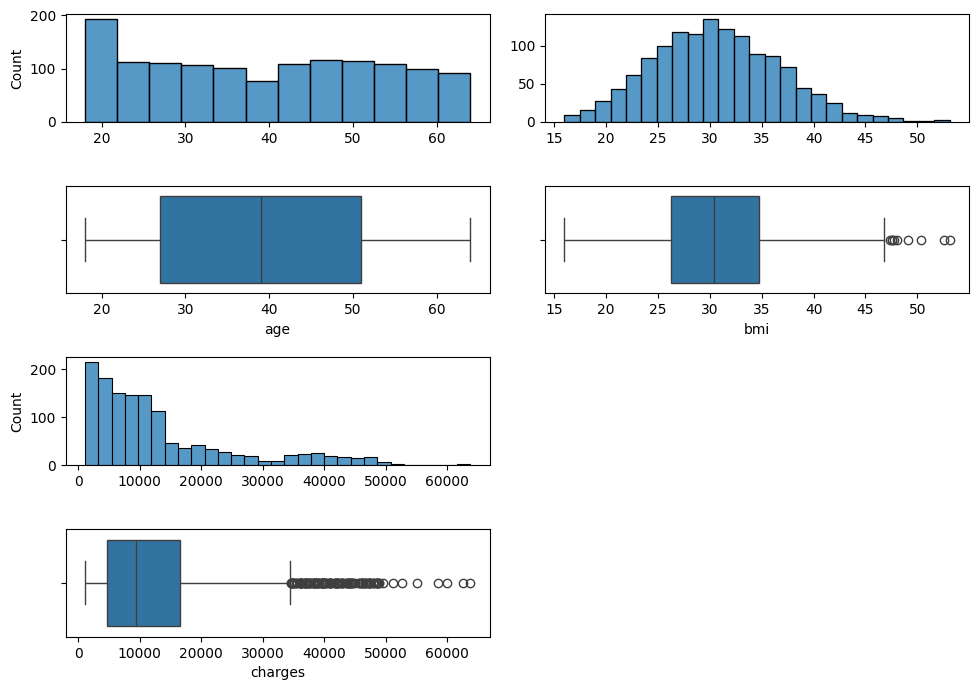

In [ ]:
# Crear una figura múltiple con histogramas y diagramas de caja
fig, axis = plt.subplots(4, 2, figsize=(10, 7))

# Crear histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=data, x="age").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=data, x="age")
sns.histplot(ax=axis[0, 1], data=data, x="bmi").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=data, x="bmi")
sns.histplot(ax=axis[2, 0], data=data, x="charges").set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=data, x="charges")


plt.tight_layout()

# Eliminar los subgráficos innecesarios
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])


plt.show()


Las gráficas muestran la distribución de las variables continuas del conjunto de datos, incluyendo edad, índice de masa corporal (IMC o BMI) y costos del seguro (charges). La edad presenta una distribución relativamente uniforme entre los 20 y 60 años, con una ligera concentración en los extremos jóvenes y mayores. El IMC sigue una distribución aproximadamente normal centrada alrededor de 30, aunque con presencia de valores atípicos en el rango superior. En cuanto a los costos del seguro, estos están fuertemente sesgados a la derecha: la mayoría de los individuos paga menos de $15,000, pero hay numerosos valores extremos que alcanzan hasta los $60,000, como se evidencia en el histograma y la caja con bigotes (boxplot). Esto indica una alta variabilidad en los cargos.

In [8]:

# Codificar las columnas 'sex', 'smoker' y 'region' como números
data["sex"] = pd.factorize(data["sex"])[0]
data["smoker"] = pd.factorize(data["smoker"])[0]
data["region"] = pd.factorize(data["region"])[0]

# Mostrar las primeras filas para verificar
print(data.head())


   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       0       0  16884.92400
1   18    1  33.770         1       1       1   1725.55230
2   28    1  33.000         3       1       1   4449.46200
3   33    1  22.705         0       1       2  21984.47061
4   32    1  28.880         0       1       2   3866.85520


/tmp/ipykernel_2957/1618803963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["sex"] = pd.factorize(data["sex"])[0]
/tmp/ipykernel_2957/1618803963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["smoker"] = pd.factorize(data["smoker"])[0]
/tmp/ipykernel_2957/1618803963.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

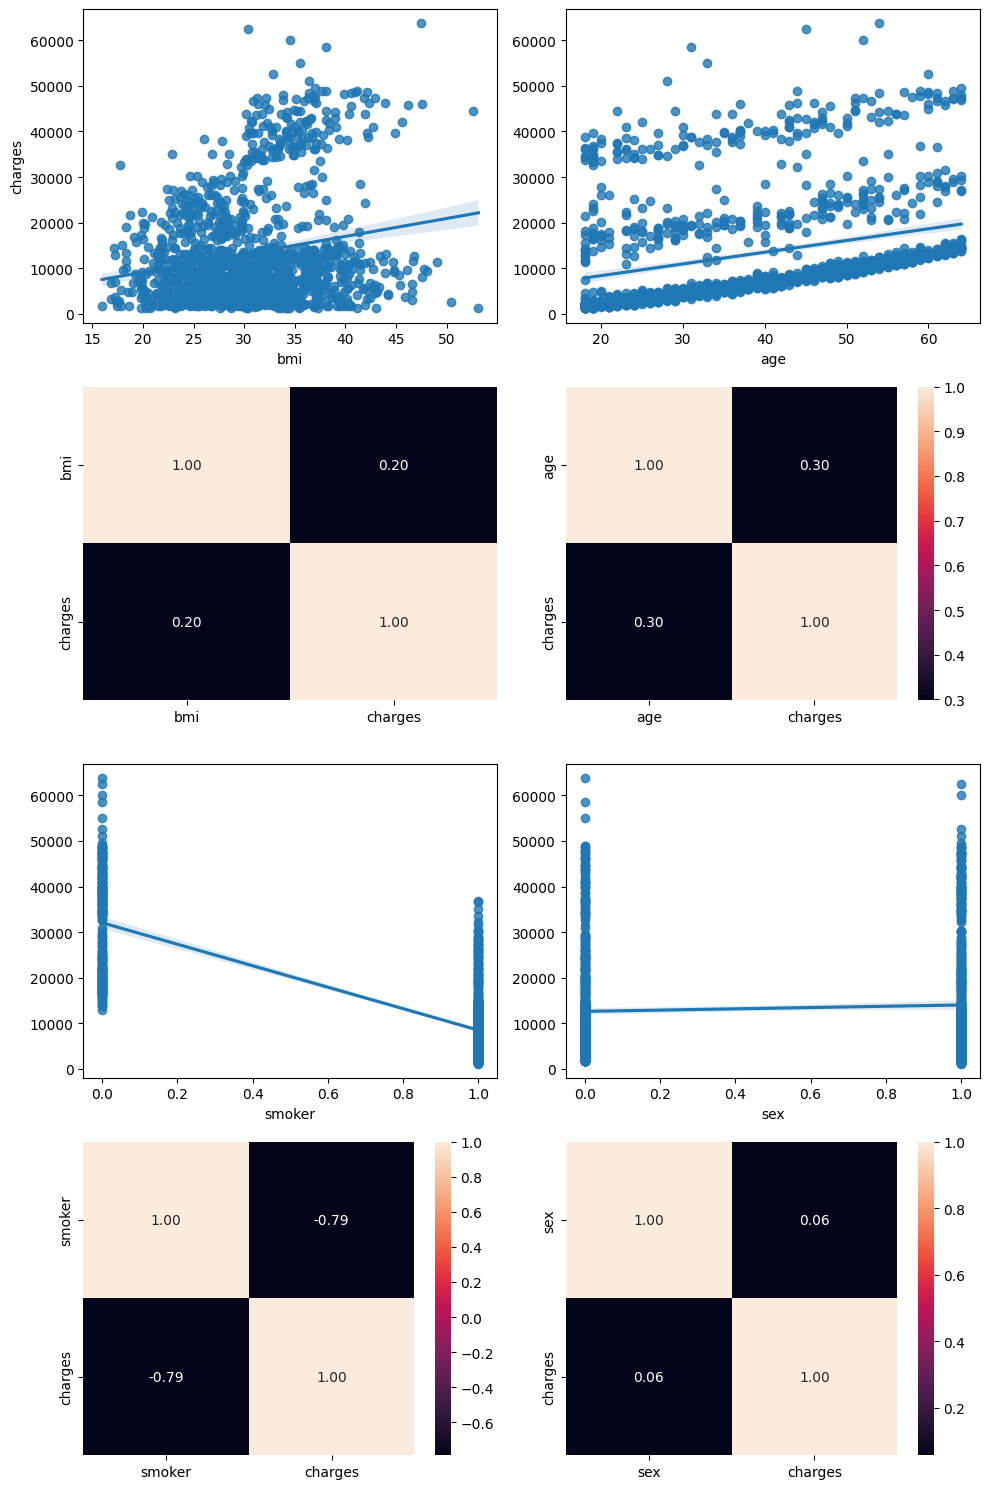

In [ ]:
# Crear una figura con múltiples subgráficos
fig, axis = plt.subplots(4, 2, figsize=(10, 15))

# Crear un diagrama de dispersión múltiple y mapas de calor
sns.regplot(ax=axis[0, 0], data=data, x="bmi", y="charges")
sns.heatmap(data[["bmi", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=data, x="age", y="charges").set(ylabel=None)
sns.heatmap(data[["age", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])
sns.regplot(ax=axis[2, 0], data=data, x="smoker", y="charges").set(ylabel=None)
sns.heatmap(data[["smoker", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0])
sns.regplot(ax=axis[2, 1], data=data, x="sex", y="charges").set(ylabel=None)
sns.heatmap(data[["sex", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1])


plt.tight_layout()


plt.show()

El análisis gráfico y de correlación muestra cómo distintas variables influyen en los costos del seguro médico (charges). La edad presenta una correlación moderada y positiva (0.30) con los costos, lo que indica que a mayor edad, los cargos suelen aumentar. El IMC también muestra una relación positiva pero más débil (0.20), sugiriendo que un mayor índice de masa corporal está modestamente asociado con mayores costos. La variable con mayor impacto es el tabaquismo, con una fuerte correlación negativa (-0.79) debido al uso de codificación binaria (donde 1 = fumador), lo que implica que los fumadores tienden a incurrir en costos significativamente más altos. En contraste, el sexo tiene una correlación casi nula (0.06), lo que indica que no hay una diferencia relevante en los costos entre hombres y mujeres. Estas relaciones se refuerzan visualmente en los diagramas de dispersión, donde los fumadores presentan un claro aumento en los cargos, y se observa una tendencia creciente más sutil con la edad y el IMC. 

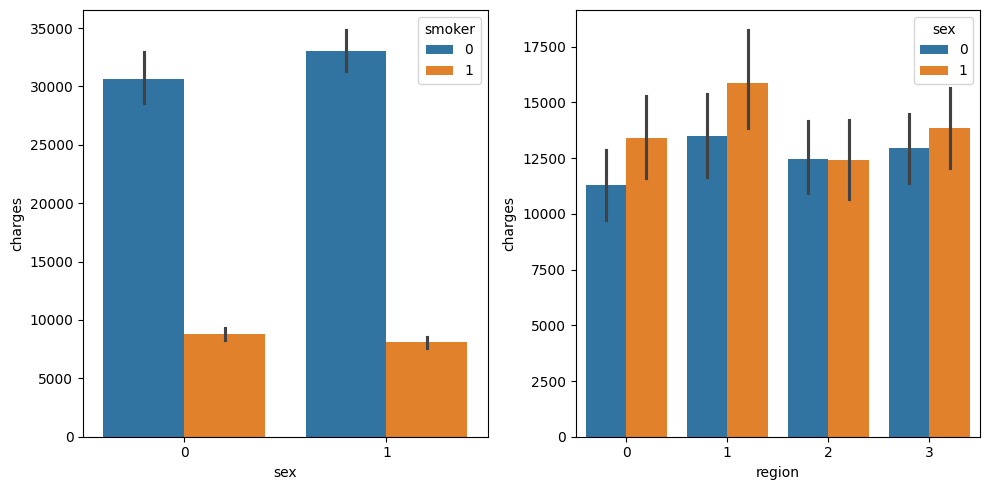

In [10]:

# Crear una figura con 2 columnas
fig, axis = plt.subplots(figsize=(10, 5), ncols=2)

# Crear gráficos de barras
sns.barplot(ax=axis[0], data=data, x="sex", y="charges", hue="smoker")
sns.barplot(ax=axis[1], data=data, x="region", y="charges", hue="sex")


plt.tight_layout()


plt.show()


Las gráficas comparan el costo promedio de los seguros médicos en función del sexo, el tabaquismo y la región. En la primera gráfica, se observa que los fumadores (código 0) tienen significativamente mayores costos que los no fumadores (código 1), tanto en hombres como en mujeres, siendo los hombres fumadores los que registran los mayores cargos promedio. Esto confirma que el tabaquismo es un factor determinante en el aumento de los costos. En la segunda gráfica, se comparan los cargos por región y sexo. Aunque hay variaciones, los promedios entre regiones no muestran grandes diferencias significativas, aunque la región 1 parece tener los valores más altos, especialmente para las mujeres. En conjunto, estos gráficos destacan que el tabaquismo es el principal factor diferenciador en los costos, mientras que el sexo y la región tienen un impacto menor o más moderado.

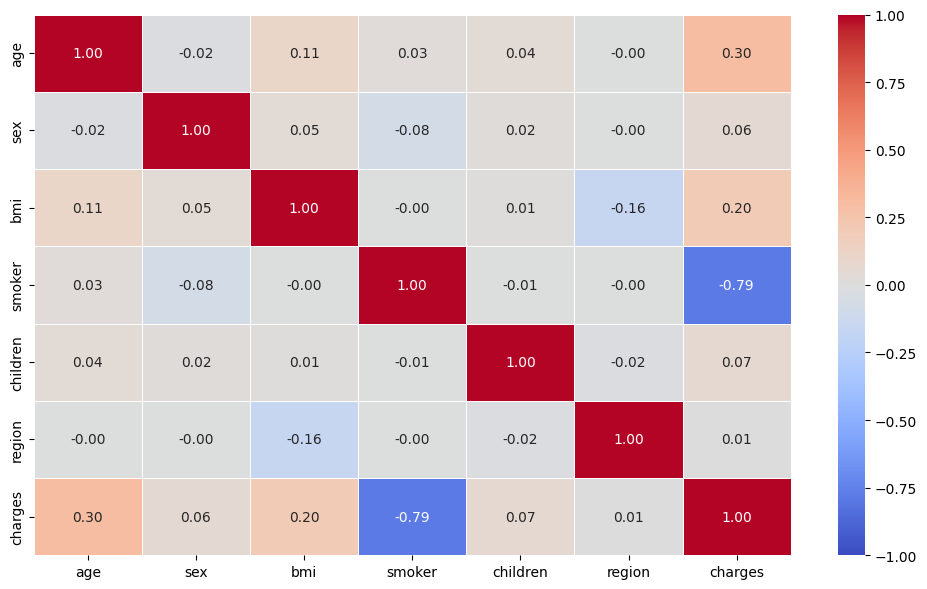

In [12]:
# Crear una figura para el mapa de calor
fig, axis = plt.subplots(figsize=(10, 6))

# Calcular la matriz de correlación
corr_matrix = data[["age", "sex", "bmi", "smoker", "children", "region", "charges"]].corr()

# Crear un mapa de calor con una paleta de colores diferente y límite en el color
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, center=0, linewidths=0.5)


plt.tight_layout()


plt.show()

El mapa de calor muestra la matriz de correlación entre las variables del conjunto de datos, revelando la fuerza y dirección de las relaciones lineales entre ellas. La variable que más se correlaciona con los costos del seguro médico (charges) es el tabaquismo (smoker), con una fuerte correlación negativa de -0.79, lo cual se debe a que en la codificación usada, los fumadores están representados por 1, y los no fumadores por 0; es decir, los fumadores tienden a tener costos mucho más altos. La edad también muestra una correlación moderada (0.30), indicando que los costos aumentan con la edad. El IMC (bmi) tiene una correlación débil pero positiva (0.20), lo que sugiere un ligero aumento de los costos con un mayor índice de masa corporal. El sexo, la cantidad de hijos, y la región tienen correlaciones muy cercanas a cero, lo que indica que estas variables no tienen una relación lineal significativa con los cargos.

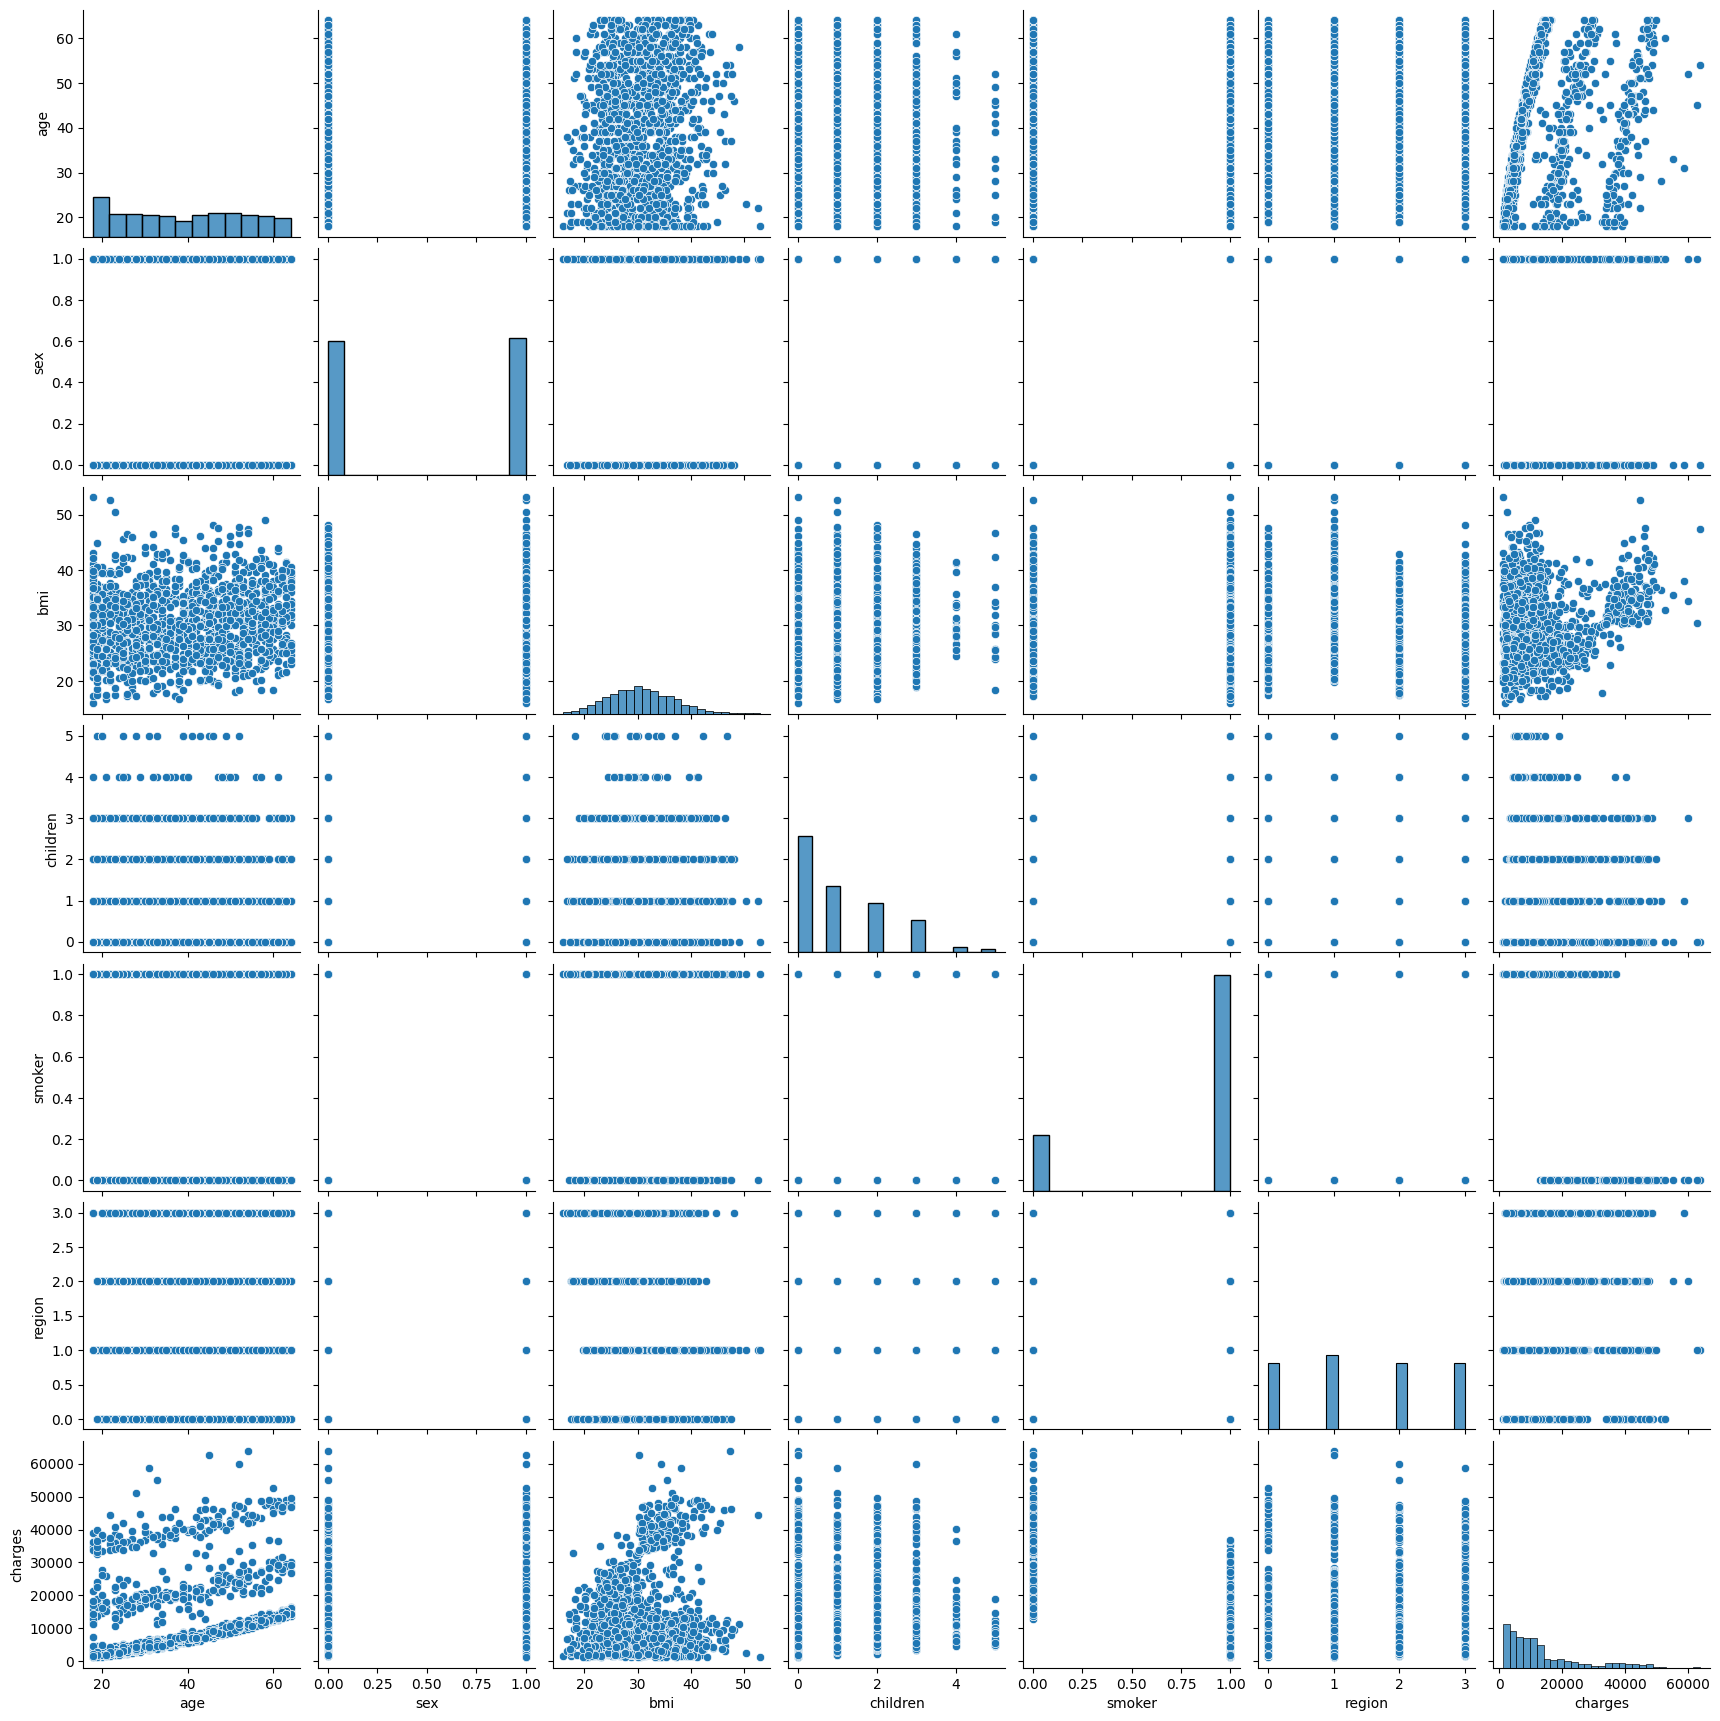

In [13]:
# Crear un pairplot para visualizar las relaciones entre las variables
sns.pairplot(data=data)


plt.show()

Este gráfico muestra una matriz de dispersión (scatter plot matrix) que permite analizar las relaciones entre varias variables de un conjunto de datos. Se observan patrones interesantes como la relación lineal entre la edad y los cargos médicos, lo que sugiere que, en general, los cargos aumentan con la edad. También se nota una distribución sesgada en algunas variables, como los cargos y el número de hijos, donde la mayoría de los datos se agrupan cerca de valores bajos. Además, la variable "smoker" muestra una distribución claramente segmentada, con una fuerte concentración de valores alrededor de 0 (no fumadores). Las variables categóricas como "sex" y "region" también están claramente representadas, lo que indica que pueden no tener una relación fuerte con otras variables numéricas.

In [14]:
# Obtener un resumen estadístico de las variables numéricas
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


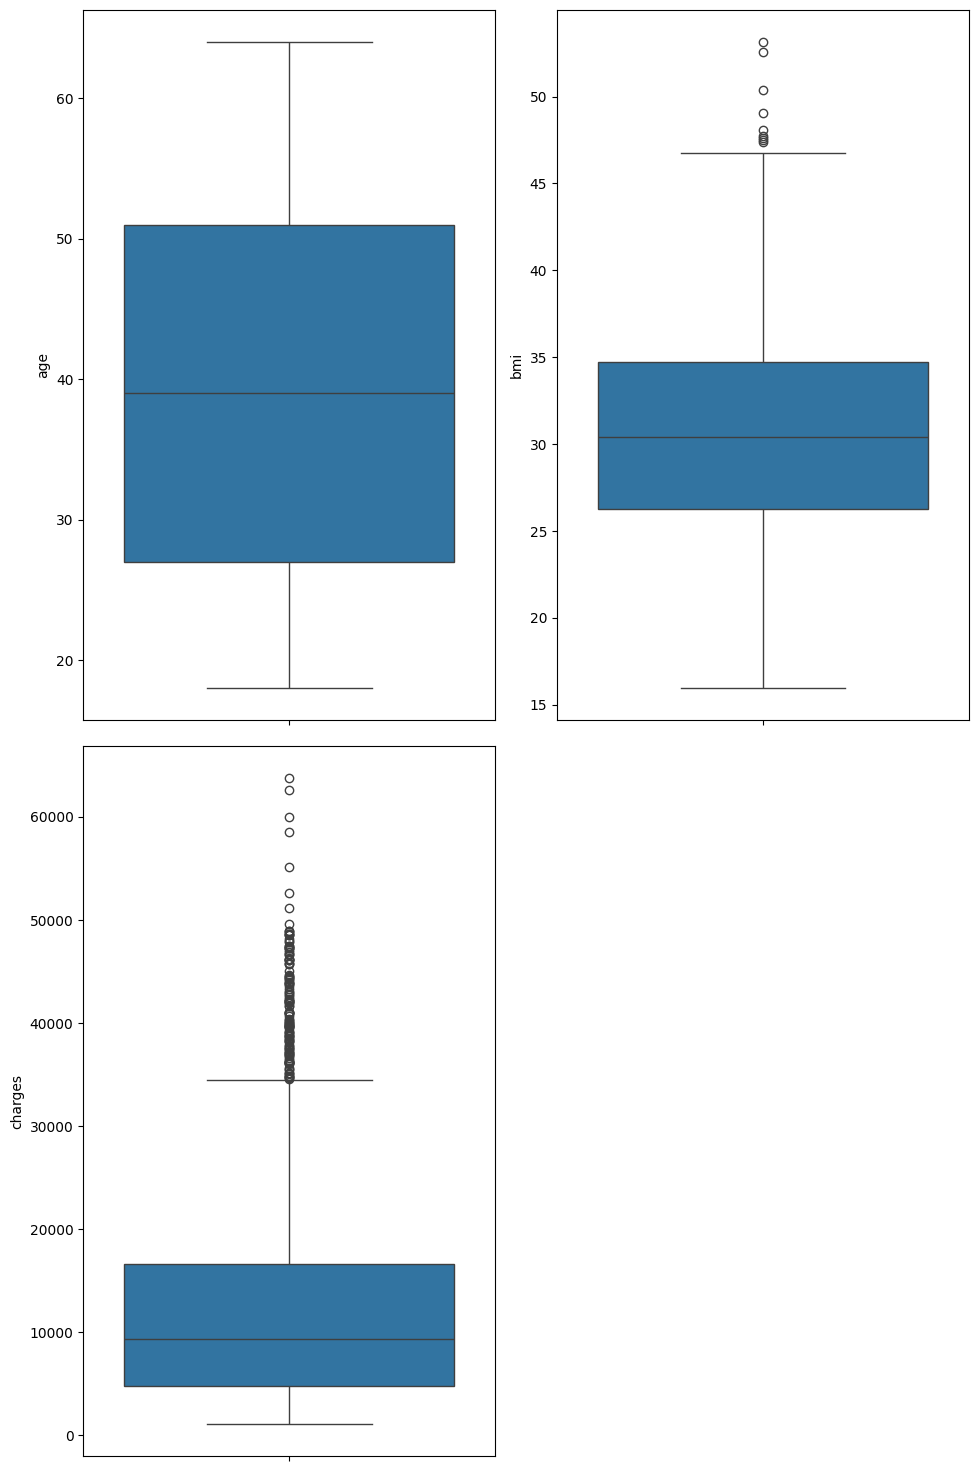

In [15]:
# Crear una figura con 2 filas y 2 columnas de subgráficos
fig, axis = plt.subplots(2, 2, figsize=(10, 15))

# Crear los diagramas de caja para 'age', 'bmi' y 'charges'
sns.boxplot(ax=axis[0, 0], data=data, y="age")
sns.boxplot(ax=axis[0, 1], data=data, y="bmi")
sns.boxplot(ax=axis[1, 0], data=data, y="charges")


plt.tight_layout()

# Eliminar el subgráfico vacío
fig.delaxes(axis[1, 1])


plt.show()

El gráfico de cajas muestra una distribución de tres variables: edad, índice de masa corporal (IMC) y cargos médicos. La distribución de la edad es relativamente uniforme, con una mediana en torno a los 40 años, aunque se observan valores extremos más bajos. El IMC muestra una ligera tendencia hacia valores más altos, con una mediana cerca de 30, y varios valores atípicos por encima de 40. Por último, los cargos médicos tienen una gran dispersión, con una mediana cerca de 10,000, pero se observan muchos valores atípicos elevados, incluso superiores a 50,000, lo que indica que existen individuos con cargos médicos considerablemente más altos que la mayoría.

In [ ]:
# Obtener las estadísticas descriptivas de la columna 'age'
age_stats = data["age"].describe()


age_stats

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
# Obtener las estadísticas descriptivas de la columna 'age'
age_stats = data["age"].describe()

# Calcular el rango intercuartílico (IQR)
age_iqr = age_stats["75%"] - age_stats["25%"]

# Calcular los límites superior e inferior para detectar valores atípicos
upper_limit = age_stats["75%"] + 1.5 * age_iqr
lower_limit = age_stats["25%"] - 1.5 * age_iqr


print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(age_iqr, 2)}")

The upper and lower limits for finding outliers are 87.0 and -9.0, with an interquartile range of 24.0


In [19]:
# Filtrar las filas donde 'age' es mayor a 87
filtered_data = data[data["age"] > 87]


filtered_data

,age,sex,bmi,children,smoker,region,charges


In [20]:
# Filtrar las filas donde 'age' es menor a -9
filtered_data = data[data["age"] < -9]


filtered_data

,age,sex,bmi,children,smoker,region,charges


In [21]:
# Obtener las estadísticas descriptivas de la columna 'bmi'
bmi_stats = data["bmi"].describe()


bmi_stats

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [ ]:
# Obtener las estadísticas descriptivas de la columna 'bmi'
bmi_stats = data["bmi"].describe()

# Calcular el rango intercuartílico (IQR)
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]

# Calcular los límites superior e inferior para detectar valores atípicos
upper_limit = bmi_stats["75%"] + 1.5 * bmi_iqr
lower_limit = bmi_stats["25%"] - 1.5 * bmi_iqr


print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(bmi_iqr, 2)}")

The upper and lower limits for finding outliers are 47.32 and 13.67, with an interquartile range of 8.41


In [24]:
# Filtrar las filas donde 'bmi' es mayor a 47.32
filtered_data = data[data["bmi"] > 47.32]


filtered_data

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,1,1,11381.32540
286,46,0,48.07,2,1,3,9432.92530
401,47,1,47.52,1,1,1,8083.91980
543,54,0,47.41,0,0,1,63770.42801
847,23,1,50.38,1,1,1,2438.05520
860,37,0,47.60,2,0,0,46113.51100
1047,22,1,52.58,1,0,1,44501.39820
1088,52,1,47.74,1,1,1,9748.91060
1317,18,1,53.13,0,1,1,1163.46270


In [29]:
# Filtrar las filas donde 'bmi' es menor a 8.41
filtered_data = data[data["bmi"] < 8.41]


filtered_data

,age,sex,bmi,children,smoker,region,charges


In [27]:
# Obtener las estadísticas descriptivas de la columna 'charges'
charges_stats = data["charges"].describe()


charges_stats

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [28]:
# Obtener las estadísticas descriptivas de la columna 'charges'
charges_stats = data["charges"].describe()

# Calcular el rango intercuartílico (IQR)
charges_iqr = charges_stats["75%"] - charges_stats["25%"]

# Calcular los límites superior e inferior para detectar valores atípicos
upper_limit = charges_stats["75%"] + 1.5 * charges_iqr
lower_limit = charges_stats["25%"] - 1.5 * charges_iqr

# Imprimir los resultados
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(charges_iqr, 2)}")

The upper and lower limits for finding outliers are 34524.78 and -13120.72, with an interquartile range of 11911.37


In [30]:
# Filtrar las filas donde 'age' es mayor a 34489.35
filtered_data = data[data["age"] > 34489.35]


filtered_data

,age,sex,bmi,children,smoker,region,charges


In [31]:
# Filtrar las filas donde 'bmi' es menor a -13109.15
filtered_data = data[data["bmi"] < -13109.15]


filtered_data

,age,sex,bmi,children,smoker,region,charges


En concluión, no era necesario eliminar ningún registro de las variables, ya que los valores atípicos no son lo suficientemente extremos como para tener un impacto negativo significativo en el modelo. 

In [32]:
# Contar los valores nulos en cada columna y ordenarlos de mayor a menor
null_values = data.isnull().sum().sort_values(ascending=False)

null_values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definir las variables numéricas
num_variables = ["age", "bmi", "children", "smoker", "charges"]

# Crear un objeto StandardScaler para normalizar los datos
scaler = StandardScaler()

# Normalizar las características numéricas
norm_features = scaler.fit_transform(data[num_variables])

# Crear un nuevo DataFrame con los datos normalizados
data_norm = pd.DataFrame(norm_features, index=data.index, columns=num_variables)

# Verificar los primeros registros de los datos normalizados
data_norm.head()

# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = data_norm.drop("charges", axis=1)
y = data_norm["charges"]

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
import os

# Definir el directorio donde se guardarán los archivos
output_dir = "/workspaces/regresionLineal/data/processed"

# Verificar si el directorio existe; si no, crearlo
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Agregar la columna 'charges' a X_train y X_test
X_train["charges"] = list(y_train)
X_test["charges"] = list(y_test)

# Guardar los DataFrames de entrenamiento y prueba como archivos CSV
X_train.to_csv(os.path.join(output_dir, "data_train.csv"), index=False)
X_test.to_csv(os.path.join(output_dir, "data_test.csv"), index=False)


# REGRESIÓN LINEAL 

In [37]:
# Leer los archivos CSV de entrenamiento y prueba
train_data = pd.read_csv("/workspaces/regresionLineal/data/processed/data_train.csv")
test_data = pd.read_csv("/workspaces/regresionLineal/data/processed/data_test.csv")


train_data.head()

,age,bmi,children,smoker,charges
0,-1.155499,-1.009063,-0.909234,0.507702,-0.898990
1,-1.297958,-0.806543,0.750351,0.507702,-0.825987
2,0.910164,1.125178,0.750351,0.507702,1.668027
3,1.693691,1.772092,-0.909234,0.507702,0.010430
4,0.554015,-0.666338,0.750351,0.507702,-0.294344


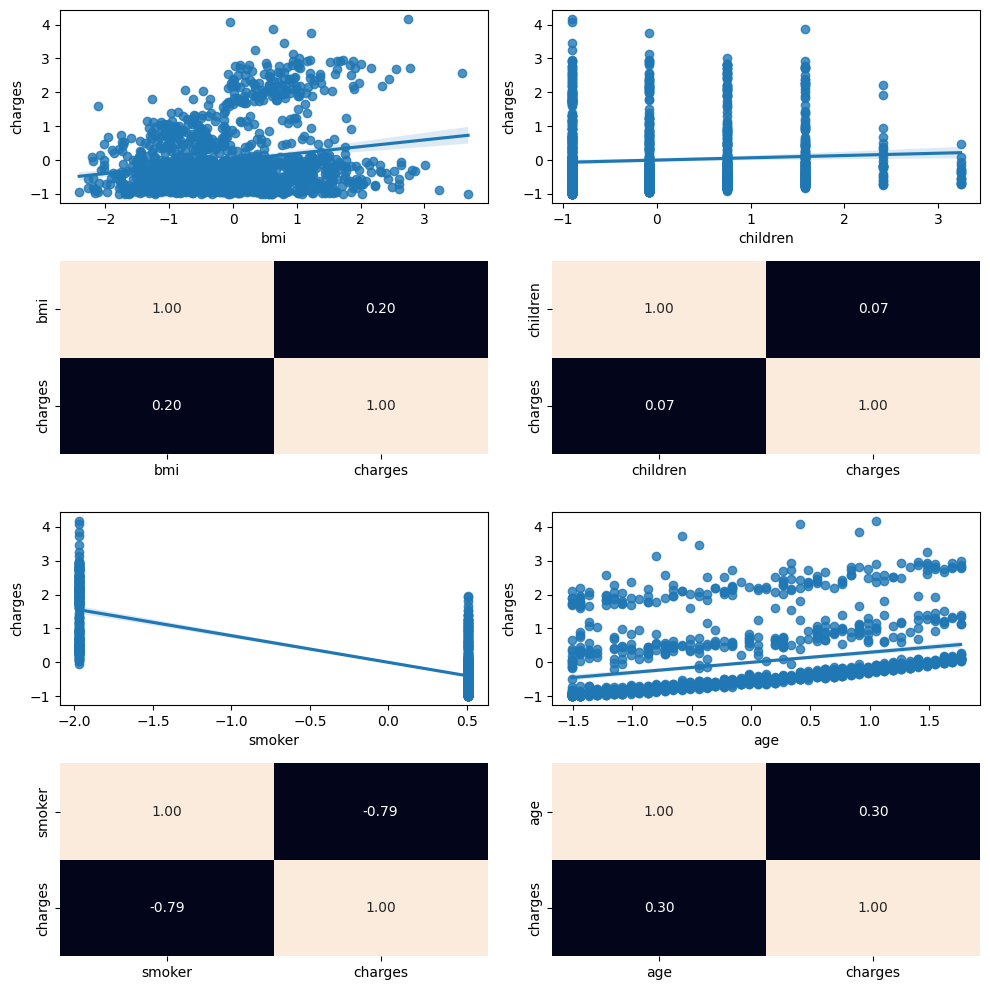

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combinar los datos de entrenamiento y prueba
total_data = pd.concat([train_data, test_data])

# Crear la figura y los ejes para los subgráficos
fig, axis = plt.subplots(4, 2, figsize=(10, 10))

# Crear los gráficos de dispersión y heatmaps
sns.regplot(ax=axis[0, 0], data=total_data, x="bmi", y="charges")
sns.heatmap(total_data[["bmi", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=total_data, x="children", y="charges")
sns.heatmap(total_data[["children", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)
sns.regplot(ax=axis[2, 0], data=total_data, x="smoker", y="charges")
sns.heatmap(total_data[["smoker", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cbar=False)
sns.regplot(ax=axis[2, 1], data=total_data, x="age", y="charges")
sns.heatmap(total_data[["age", "charges"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

# Ajustar el layout para que los gráficos no se sobrepongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Se observa que la relación entre el BMI (índice de masa corporal) y los cargos es positiva, pero débil, ya que el coeficiente de correlación es 0.20. La variable "children" muestra una relación prácticamente nula con los cargos (correlación de 0.07). Sin embargo, la variable "smoker" tiene una correlación negativa de -0.79 con los cargos, lo que indica que ser fumador está relacionado con un menor valor en los cargos. Finalmente, la edad tiene una correlación positiva moderada de 0.30 con los cargos, lo que sugiere que a medida que la edad aumenta, también lo hacen los cargos, pero la relación no es tan fuerte como en el caso de "smoker". 

In [39]:
# Dividir los datos de entrenamiento en características (X) y variable objetivo (y)
X_train = train_data.drop(["charges"], axis=1)
y_train = train_data["charges"]

# Dividir los datos de prueba en características (X) y variable objetivo (y)
X_test = test_data.drop(["charges"], axis=1)
y_test = test_data["charges"]


In [40]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


LinearRegression()

In [41]:
# Imprimir el intercepto y los coeficientes del modelo
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2, b3): {model.coef_}")

Intercept (a): -0.007416083871688874
Coefficients (b1, b2, b3): [ 0.28898608  0.1537753   0.05355447 -0.76832625]


In [42]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar las predicciones
y_pred


array([-0.45039471, -0.60653329,  0.07384511,  1.51527235, -0.33172286,
        0.01660583,  1.36365178, -0.96116205, -0.19849466, -0.16136514,
       -0.23931546,  1.6369551 ,  1.42781396,  0.33839596, -0.25682413,
       -0.28788969, -0.73850767,  1.54974158, -0.80507617, -0.63923651,
       -0.78294677,  1.36881275,  0.14697546,  1.43750052,  1.45187073,
       -0.65759774,  1.84805673,  1.93880843, -0.19754073,  0.03736641,
       -0.60531238, -0.01834415, -1.0237728 , -0.07440701,  2.18371597,
       -0.07013128, -0.69228854, -0.77286156,  1.49464052, -0.32813515,
       -0.57017927,  1.35611452,  1.80212736, -0.11804275, -0.4879502 ,
       -0.79983079, -0.64053901, -0.34323772, -0.75198745, -0.31960783,
       -0.52939334, -0.1483772 ,  1.44343195, -0.77462531, -0.17060531,
       -0.25829314, -0.23303027, -0.8999813 ,  1.50185748, -0.322568  ,
        0.20534162, -0.39922958, -0.06739268, -0.99747944,  0.30410522,
       -0.24803644, -0.26586133,  1.46279075,  0.9662434 ,  0.22

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular y mostrar el error cuadrático medio y el coeficiente de determinación
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination (R^2): {r2_score(y_test, y_pred)}")


Mean squared error: 0.2450650135043427
Coefficient of determination (R^2): 0.8045531086669286


El modelo de regresión lineal presenta un intercepto de -0.0074, lo que indica que, en ausencia de las variables predictoras, el valor de charges sería cercano a este valor. Los coeficientes para las variables independientes muestran la influencia de cada una sobre el valor de charges: por ejemplo, el coeficiente de 0.289 para bmi indica que, por cada aumento de una unidad en el índice de masa corporal, el valor de charges aumentará en promedio en 0.289 unidades, manteniendo las demás variables constantes. Asimismo, el error cuadrático medio (MSE) de 0.2451 sugiere que el modelo tiene un rendimiento razonablemente bueno al predecir los valores de charges, aunque siempre se puede mejorar. El coeficiente de determinación R**2 de 0.8046 indica que el modelo explica aproximadamente el 80.46% de la variabilidad en los datos, lo que sugiere un ajuste bastante bueno, pero que hay espacio para mejoras en la predicción de los valores. En general, el modelo muestra una relación fuerte entre las variables seleccionadas y los cargos